In [3]:
import sys
sys.path.insert(0, "..")

# Per DFG

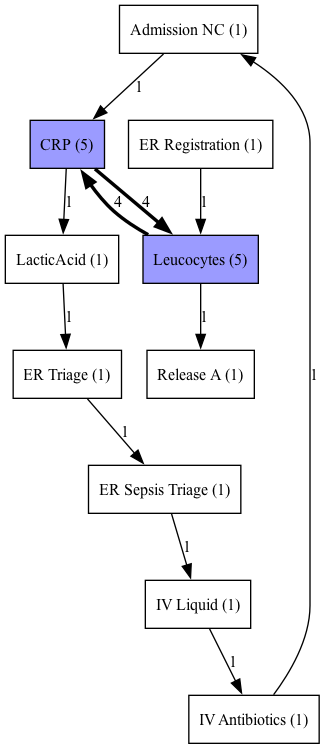

                 src               tgt  freq_0  time_mean_0  time_median_0  \
0       Admission NC               CRP       1     154001.0       154001.0   
1                CRP        LacticAcid       1          0.0            0.0   
2                CRP        Leucocytes       4     129600.0       172800.0   
3    ER Registration        Leucocytes       1        679.0          679.0   
4   ER Sepsis Triage         IV Liquid       1       8987.0         8987.0   
5          ER Triage  ER Sepsis Triage       1         23.0           23.0   
6     IV Antibiotics      Admission NC       1        572.0          572.0   
7          IV Liquid    IV Antibiotics       1          0.0            0.0   
8         LacticAcid         ER Triage       1        397.0          397.0   
9         Leucocytes               CRP       4      64800.0        43200.0   
10        Leucocytes         Release A       1      26100.0        26100.0   

    time_min_0  time_max_0  time_stdev_0  
0     154001.0    15

In [10]:
# mined model

from modules.mine_utils import read_log
from modules.mine_utils import mine_dfg
from modules.cmp_logs import log_to_dfg

log = read_log("data/sublog0.csv")
mine_dfg(log)

mined_dfg = log_to_dfg(log, 0)
print(mined_dfg)

In [ ]:
# normative model

from pm4py.visualization.dfg import visualizer as dfg_visualizer
from modules.cmp_logs import dict_to_dfg
from modules.utils import read_dict

norm_dict = read_dict("data/norm.py")
dfg_visualizer.view(dfg_visualizer.apply(norm_dict))

norm_dfg = dict_to_dfg(norm_dict, 1)
print(norm_dfg)

In [12]:
from modules.cmp_logs import compare_dfgs, print_cmp_results, GroupTypes

cmp_results = compare_dfgs([ mined_dfg, norm_dfg ])

print("-- compare by log\n")
print_cmp_results(cmp_results, [ "mined", "normative" ], group_type=GroupTypes.BY_LOG)

# print("-- compare by element\n")
# print_cmp_results(cmp_results, [ "mined", "normative" ], group_type=GroupTypes.BY_ELEMENT)

-- compare by log

> mined
- compared to normative:
. extra events: LacticAcid
. missing events: Release B
. extra edges:
 CRP -> LacticAcid
LacticAcid -> ER Triage
. missing edges:
 CRP -> ER Triage
ER Sepsis Triage -> Release B


> normative
- compared to mined:
. extra events: Release B
. missing events: LacticAcid
. extra edges:
 CRP -> ER Triage
ER Sepsis Triage -> Release B
. missing edges:
 CRP -> LacticAcid
LacticAcid -> ER Triage




# Alignments

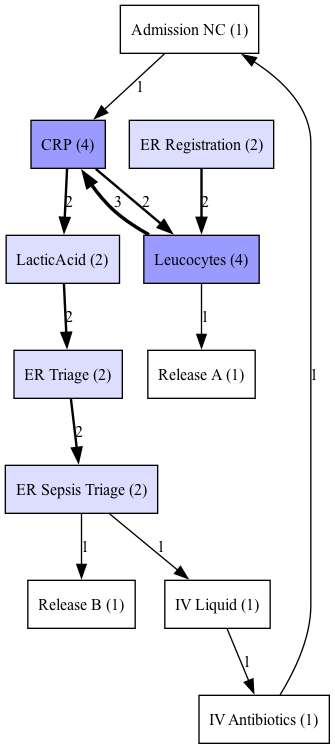

In [59]:
from modules.mine_utils import read_log, mine_dfg

log = read_log("data/sublog1.csv")
_ = mine_dfg(log)

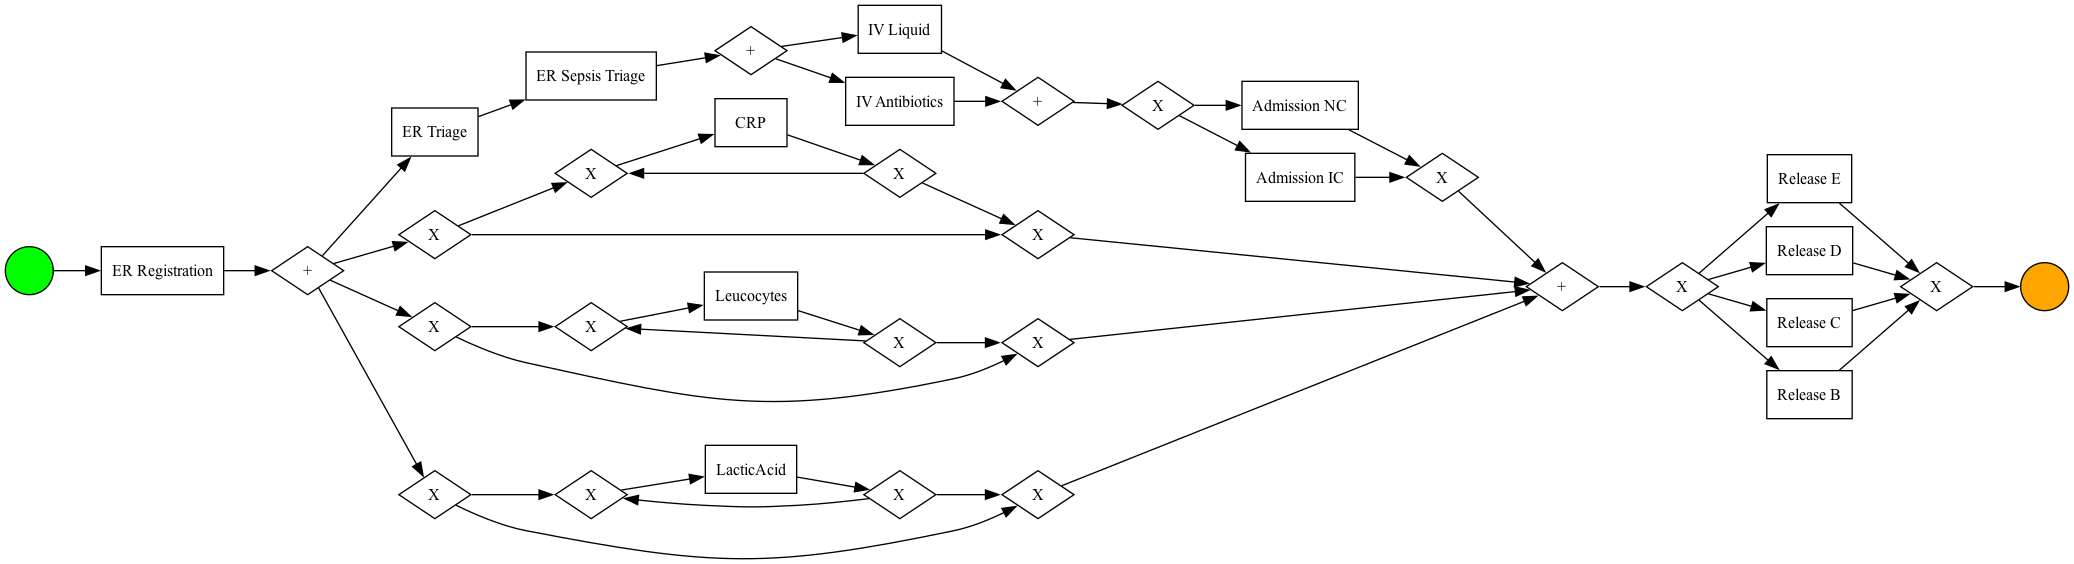

trace B :
ER Registration, Leucocytes, CRP, LacticAcid, ER Triage, ER Sepsis Triage, Release B
trace: ER Registration  |    Leucocytes    |       CRP        |    LacticAcid    |    ER Triage     | ER Sepsis Triage |        >>        |        >>        |        >>        |    Release B     |
       ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
model: ER Registration  |    Leucocytes    |       CRP        |    LacticAcid    |    ER Triage     | ER Sepsis Triage |    IV Liquid     |  IV Antibiotics  |   Admission IC   |    Release B     |


trace C :
ER Registration, Leucocytes, CRP, LacticAcid, ER Triage, ER Sepsis Triage, IV Liquid, IV Antibiotics, Admission NC, CRP, Leucocytes, CRP, Leucocytes, Release A
trace: ER Registration  |    Leucocytes    |       CRP        |    LacticAcid    |    ER Triage     | ER Sepsis Triage |    IV Liquid     |  IV Anti

In [ ]:
import pm4py
from modules.align_log import align_bpmn_log, pretty_print_alignments
from modules.mine_utils import read_log
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer
from pm4py.objects.conversion.bpmn import converter as bpmn_converter

# read BPMN, log
bpmn = pm4py.read_bpmn("data/norm.bpmn")
log = read_log("data/sublog1.csv")

# net, marking, fmarking = bpmn_converter.apply(bpmn)
# gviz = pn_visualizer.apply(net, marking, fmarking)
# pn_visualizer.view(gviz)

# show BPMN
gviz = bpmn_visualizer.apply(bpmn)
bpmn_visualizer.view(gviz)

# (convert to pm4py internal format)
log = log_converter.apply(log, variant=log_converter.Variants.TO_EVENT_LOG)

# align
als = align_bpmn_log(bpmn, log, filter_invis=True)
for trace, al in zip(log, als):
    if al['cost'] > 0: # if they did not match
        print("trace", trace._attributes['concept:name'], ":")
        print(", ".join([ entry['concept:name'] for entry in trace._list ]))
        pretty_print_alignments(al)